In [158]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras.backend as K
from tensorflow import keras
from keras.layers import Reshape, Conv2DTranspose, PReLU
from keras.utils import to_categorical, plot_model
from keras.layers import Concatenate
import numpy as np
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.image import resize
from scipy.linalg import sqrtm
import math
import tensorflow as tf
from IPython.display import clear_output, HTML
import glob
from keras.layers import AveragePooling2D, ZeroPadding2D, BatchNormalization, Activation, MaxPool2D, Add
from keras.layers import Normalization, Dense, Conv2D, Dropout, BatchNormalization, ReLU
from keras.models import Sequential, Model
from keras import Input
from keras.optimizers import *
from keras.callbacks import EarlyStopping
from keras.initializers import RandomNormal
from keras.layers import LeakyReLU, GlobalMaxPooling2D, GlobalAveragePooling2D
import numpy as np

In [159]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)
df = pd.read_csv('emnist-letters-train.csv', delimiter=',', header=None)

In [160]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
count,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,...,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000,99040.000000
mean,12.018084,13.182553,13.182553,13.182553,13.182563,13.186127,13.197577,13.204645,13.201817,13.197920,...,13.182553,13.182553,13.182553,13.185279,13.182876,13.182553,13.182553,13.182553,13.182553,13.182553
std,8.367573,45.515594,45.515594,45.515594,45.515592,45.517474,45.534832,45.545344,45.542036,45.536994,...,45.515594,45.515594,45.515594,45.521483,45.515614,45.515594,45.515594,45.515594,45.515594,45.515594
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,26.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [161]:
print(df.iloc[:1, ::1].values)
print(df.iloc[:1, ::1].values.min())
print(df.iloc[:1, ::1].values.max())

[[ 23   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  20 114 125
   82  37  37  39 115 157  94  21  10  32  37  37  37  37  37  37  37  82
  125 114  20   0   0   0   3 109 245 249 233 217 217 217 245 251 234 172
  142 203 217 217 217 217 217 217 217 233 249 245 109   3   0   0   4 114
  253 254 254 254 254 254 254 254 254 252 251 254 254 254 254 254 254 254
  254 254 254 254 127   4   0   0   0  45 214 233 251 254 254 254 254 255
  255 255 255 255 255 255 255 255 255 255 255 254 254 251 113   4   0   0
    0   0   5  22  82 128 160 184 217 217 218 249 254 255 255 255 255 255
  254 254 247 216 170  83   7   0   0   0   0   0   0   0   2   5  16  25
   37  40  50 227 254 255 255 254 254 

In [162]:
df.rename(columns={0: 'labels'}, inplace=True)

C:\Users\p2348935\AppData\Local\Temp\ipykernel_19848\2214283665.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x=df.labels, kind="count", data=df, height=9, palette='viridis')


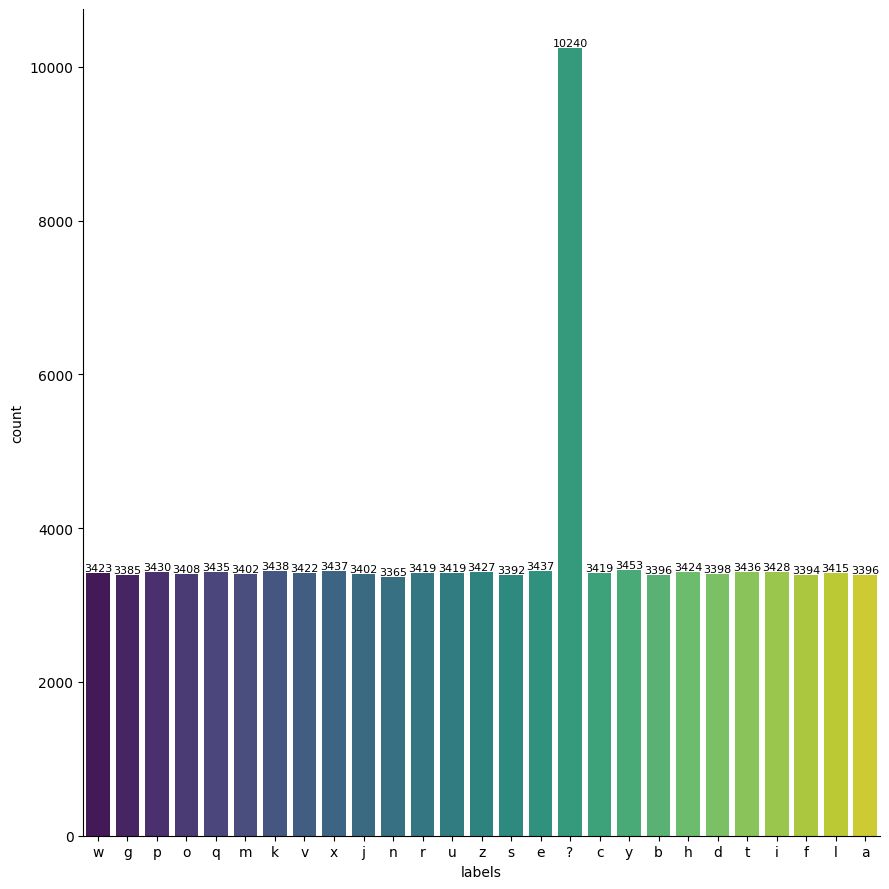

In [176]:
# Create the catplot
g = sns.catplot(x=df.labels, kind="count", data=df, height=9, palette='viridis')

ax = g.ax  

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height,  
            f'{int(height)}',  
            ha='center', va='bottom',  
            fontsize=8)  

plt.show()

### Normalization and Mapping of Labels

In [165]:
import pandas as pd

# Separate labels from pixel values
labels = df['labels']
pixels = df.drop(columns=['labels'])

# Mapping dictionary
mapping = {-1: 63, 1: 97, 2: 98, 3: 99, 4: 100, 5: 101, 6: 102, 7: 103, 8: 104, 9: 105, 10: 106, 11: 107, 12: 108, 13: 109, 14: 110, 15: 111, 16: 112, 17: 113, 18: 114, 19: 115, 20: 116, 21: 117, 22: 118, 23: 119, 24: 120, 25: 121, 26: 122, 27: 123}

# Apply label mapping
mapped_labels = labels.map(mapping)

# Normalize pixel values
normalized_pixels = pixels / 255.0

# Combine the mapped labels and normalized pixel values
df = pd.concat([mapped_labels, normalized_pixels], axis=1)
df.columns = ['labels'] + list(normalized_pixels.columns)

df.labels = df.labels.astype('int').apply(chr)

In [173]:
# # Number of images per label
# num_images_per_label = 5

# # Create the plot with sufficient subplots
# fig, axes = plt.subplots(len(labels), num_images_per_label, figsize=(20, len(labels) * 2))
# axes = axes.flatten()  # Flatten the 2D array of axes to easily iterate

# # Counter for current axis
# ax_index = 0

# for label in labels:
#     # Filter rows for the current label
#     label_df = df[df.iloc[:, 0] == label]
    
#     # Loop through up to 10 images for the current label
#     for i in range(min(num_images_per_label, len(label_df))):
#         image_data = label_df.iloc[i, 1:].values
        
#         # Ensure the data is in numeric format
#         image_data = np.array(image_data, dtype=np.float32)
        
#         # Reshape the flat array into a 28x28 image
#         image = image_data.reshape(28, 28)
        
#         # Display the image
#         axes[ax_index].imshow(image, cmap='gray')
#         axes[ax_index].set_title(f'Label: {label}')
#         axes[ax_index].axis('off')
        
#         # Move to the next axis
#         ax_index += 1

# # Hide any remaining empty subplots (if any)
# for ax in axes[ax_index:]:
#     ax.axis('off')

# plt.tight_layout()
# plt.show()

In [166]:
df.labels.value_counts()

labels
?    10240
y     3453
k     3438
e     3437
x     3437
t     3436
q     3435
p     3430
i     3428
z     3427
h     3424
w     3423
v     3422
u     3419
r     3419
c     3419
l     3415
o     3408
j     3402
m     3402
d     3398
b     3396
a     3396
f     3394
s     3392
g     3385
n     3365
Name: count, dtype: int64

C:\Users\p2348935\AppData\Local\Temp\ipykernel_19848\3276368546.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(x=df.labels, kind="count", data=df, height=9, palette='mako')


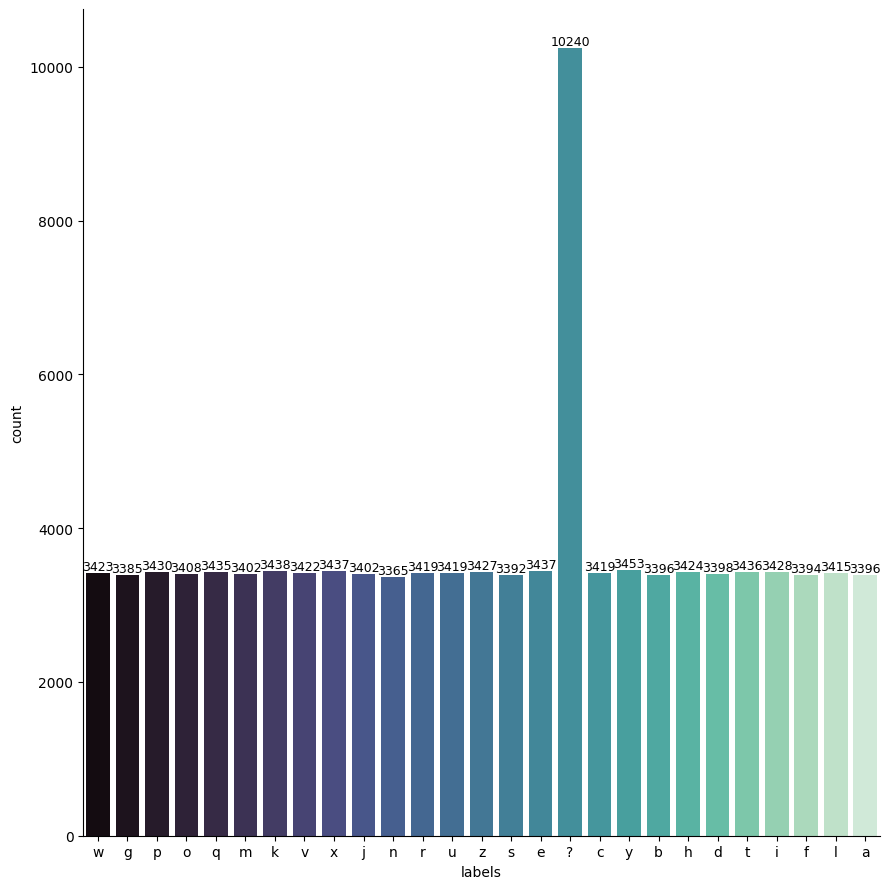

In [177]:
# Create the catplot

g = sns.catplot(x=df.labels, kind="count", data=df, height=9, palette='mako')

ax = g.ax  

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height,  
            f'{int(height)}',  
            ha='center', va='bottom',  
            fontsize=9)  

plt.show()

In [168]:
print(df[1].min())
print(df[1].max())

0.0
1.0


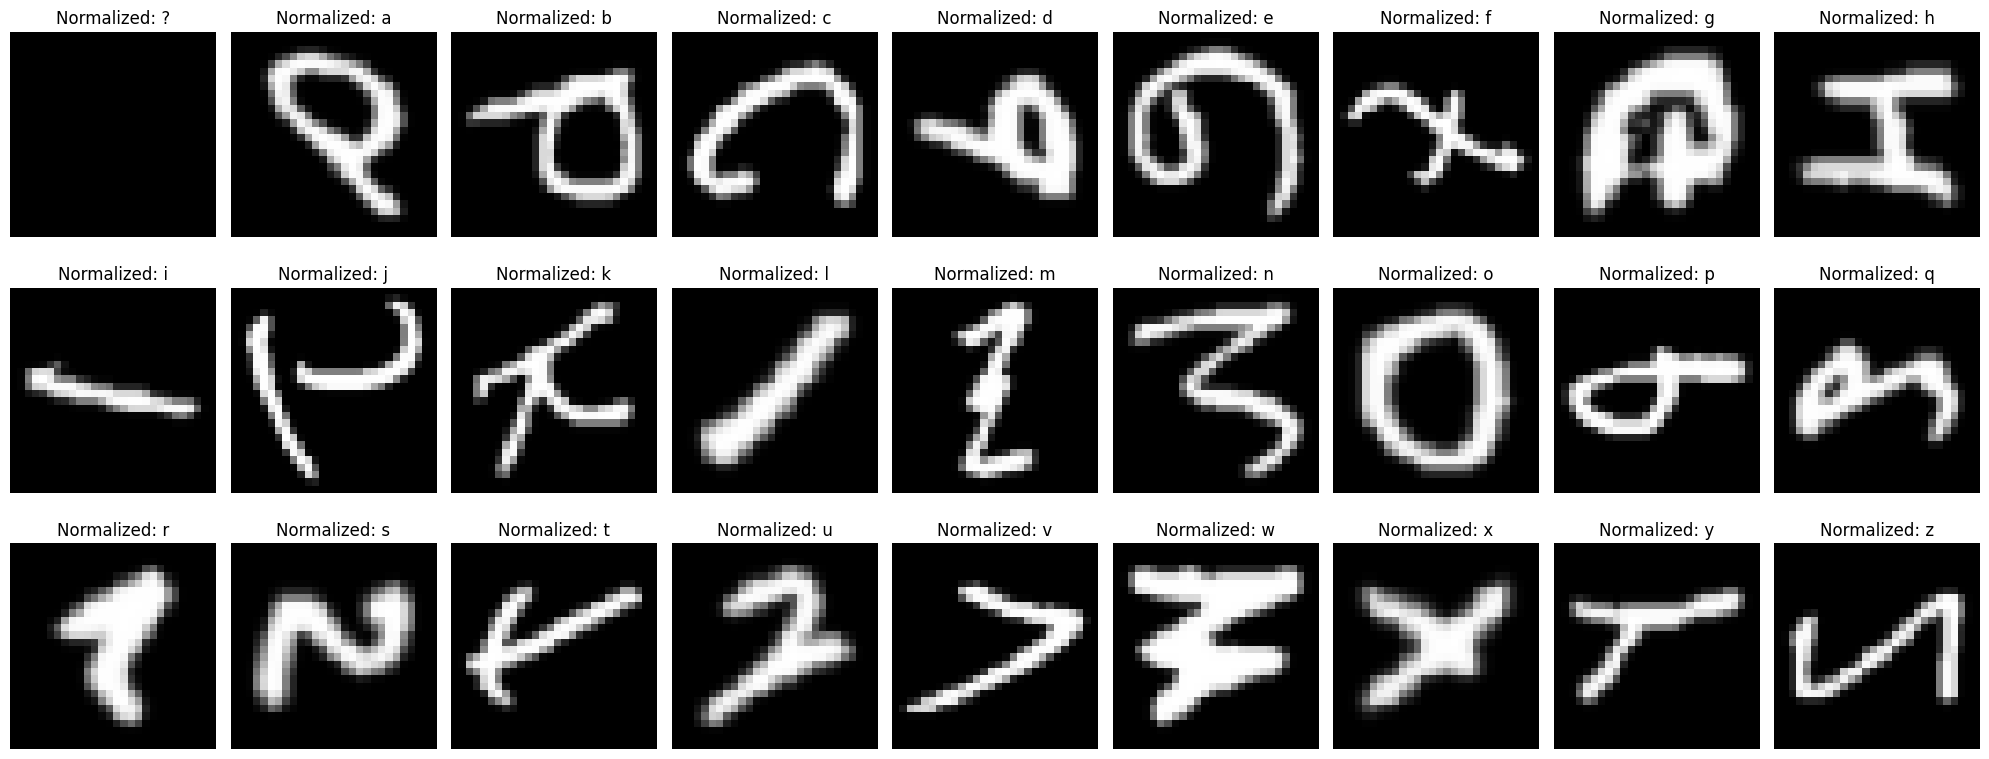

In [169]:
# Get unique labels (assuming you want the first 26 unique labels)
labels = df.iloc[:, 0].unique()
labels = np.sort(labels)

# Create the plot with sufficient subplots
fig, axes = plt.subplots(3, 9, figsize=(20, 8))  # Adjusted to 3 rows and 9 columns for demonstration
axes = axes.flatten()

for label, ax in zip(labels, axes):
    # Select the first row for each unique label
    image_data = df[df.iloc[:, 0] == label].iloc[0, 1:].values
    
    # Ensure the data is in numeric format
    image_data = np.array(image_data, dtype=np.float32)
    
    # Reshape the flat array into a 28x28 image
    image = image_data.reshape(28, 28)
    
    # Display the image
    ax.imshow(image, cmap='gray')
    ax.set_title(f'Normalized: {label}')
    ax.axis('off')

# Hide any remaining empty subplots (if any)
for ax in axes[len(labels):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

<hr>
<h3>Data Augmentation</h3>
<hr>

In [ ]:
import random
import cv2
import numpy as np
import albumentations as A

#gets PIL image and returns augmented PIL image
def augment_img(img):
  #only augment 3/4th the images
  if random.randint(1, 4) > 3:
      return img
  
  img = np.asarray(img)     #convert to numpy for opencv

  # morphological alterations
  kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
  if random.randint(1, 5) == 1:
    # dilation because the image is not inverted
    img = cv2.erode(img, kernel, iterations=random.randint(1, 2))
  if random.randint(1, 6) == 1:
    # erosion because the image is not inverted
    img = cv2.dilate(img, kernel,iterations=random.randint(1, 1))
  
  transform = A.Compose([
      
    A.OneOf([
      #add black pixels noise
      A.OneOf([
             A.RandomRain(brightness_coefficient=1.0, drop_length=2, drop_width=2, drop_color = (0, 0, 0), blur_value=1, rain_type = 'drizzle', p=0.05), 
              A.RandomShadow(p=1),
              A.PixelDropout(p=1),
         ], p=0.9),

      #add white pixels noise
      A.OneOf([
              A.PixelDropout(dropout_prob=0.5,drop_value=255,p=1),
             A.RandomRain(brightness_coefficient=1.0, drop_length=2, drop_width=2, drop_color = (255, 255, 255), blur_value=1, rain_type = None, p=1), 
        ], p=0.9),
    ], p=1),

    #transformations
    A.OneOf([
            A.ShiftScaleRotate(shift_limit=0, scale_limit=0.25, rotate_limit=2, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255),p=1),
            A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0, rotate_limit=8, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255),p=1),
            A.ShiftScaleRotate(shift_limit=0.02, scale_limit=0.15, rotate_limit=11, border_mode=cv2.BORDER_CONSTANT, value=(255,255,255),p=1),  
            A.Affine(shear=random.randint(-5, 5),mode=cv2.BORDER_CONSTANT, cval=(255,255,255), p=1)          
       ], p=0.5),
    A.Blur(blur_limit=5,p=0.25),
  ])
  img = transform(image=img)['image']  
  image = Image.fromarray(img)   
  return image


<hr>
<h3>Baseline Model</h3>
<hr>

In [ ]:
class DCGAN():
    
    # this is the function to build the generator neural network
    def build_generator(self):
        model = Sequential(name='Generator')
        model.add(Dense(128 * 7 * 7, activation="relu", input_dim=self.latent_dim)) # connect the input to dense layer
        model.add(Reshape((7, 7, 128)))
        # upsample from 7*7 to 14*14
        model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        # upsample to 28x28
        model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Conv2D(self.channels, kernel_size=7, padding="same", activation='sigmoid'))
        model.summary()
        noise = Input(shape=(self.latent_dim,))
        img = model(noise)
        return Model(noise, img)  # the keras Model class groups layers into an object with training and inference features
    
    def build_discriminator(self):
        model = Sequential(name='Discriminator')
        model.add(Conv2D(128, kernel_size=3, strides=2, input_shape=self.img_shape, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Conv2D(128, kernel_size=3, strides=2, padding="same"))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.4))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid'))
        model.summary()
        img = Input(shape=self.img_shape)
        validity = model(img)
        return Model(img, validity)

    def __init__(self, rows, cols, channels, z = 100):
        # Input shape
        self.img_rows = rows  # generated image height
        self.img_cols = cols  # generated image width
        self.channels = channels  # generated image channel
        self.img_shape = (self.img_rows, self.img_cols, self.channels)
        self.latent_dim = z  # the input is 1-D vector of noise
        # Reduce learning rate from 0.001 to 0.0002, and beta1 from 0.9 to 0.5, which can stablize training and reduce oscillation
        optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
        # Build and compile the discriminator
        self.discriminator = self.build_discriminator()
        self.discriminator.compile(loss='binary_crossentropy',
            optimizer=optimizer,
            metrics=['accuracy'])
        # Build the generator
        self.generator = self.build_generator()
        # The generator takes noise as input and generates images
        z = Input(shape=(self.latent_dim,))
        img = self.generator(z)
        # For the combined model we will only train the generator
        self.discriminator.trainable = False
        # The discriminator takes generated images as input and determines validity
        valid = self.discriminator(img)
        # The combined model (stacked generator and discriminator)
        # Trains the generator to fool the discriminator
        self.combined = Model(z, valid)
        self.combined.compile(loss='binary_crossentropy',
            optimizer=optimizer)
    
    def train(self, epochs, batch_size=128, save_interval=50):
        # Load the dataset
        (X_train, _), (_, _) = mnist.load_data()
        # Rescale 0 to 1
        X_train = X_train / 255
        X_train = np.expand_dims(X_train, axis=3)
        # Adversarial ground truths
        valid = np.ones((batch_size, 1))
        fake = np.zeros((batch_size, 1))
        for epoch in range(epochs):
            # ---------------------
            # Train Discriminator
            # ---------------------
            # Select a random half of images
            idx = np.random.randint(0, X_train.shape[0], batch_size)
            imgs = X_train[idx]
            # Sample noise and generate a batch of new images
            noise = np.random.normal(0, 1, (batch_size, self.latent_dim))
            gen_imgs = self.generator.predict(noise)
            # Train the discriminator (it classify real images as 1 and generated images as 0)
            d_loss_real = self.discriminator.train_on_batch(imgs, valid)
            d_loss_fake = self.discriminator.train_on_batch(gen_imgs, fake)
            d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
            # Train the generator (it wants discriminator to predict generated images as 1)
            g_loss = self.combined.train_on_batch(noise, valid)
            # Plot the progress
            print ("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))
            
            # If at save interval => save generated image samples
            if epoch % save_interval == 0:
                self.save_imgs(epoch)
    
    def save_imgs(self, epoch):
        r, c = 5, 5
        noise = np.random.normal(0, 1, (r * c, self.latent_dim))
        gen_imgs = self.generator.predict(noise)

        # Rescale images 0 - 1
        # gen_imgs = 0.5 * gen_imgs + 0.5

        fig, axs = plt.subplots(r, c)
        cnt = 0
        for i in range(r):
            for j in range(c):
                axs[i,j].imshow(gen_imgs[cnt, :,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        os.makedirs('generated_mnist', exist_ok=True)
        fig.savefig("generated_mnist/dcgan_mnist_improved_{:d}.png".format(epoch))
        plt.close()

In [ ]:
dcgan = DCGAN(28,28,1)
dcgan.train(epochs=5000, batch_size=256, save_interval=50)